In [175]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 2.0

warnings.filterwarnings('ignore')


In [176]:
def calc_entropy(l):
    abs_l = np.abs(l)[np.abs(l) > 0]
    per_l = abs_l / np.sum(abs_l)
    return -np.dot(np.log(per_l), per_l)

def normalize(x):
    x_ = np.array(x)
    x_ = (x_ - np.mean(x_))
    return x_ / np.std(x_)

In [177]:
file_name = 'stress_test_ei_decoder_none_dropped_1_STD_EXPL_0.003_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_ACT_PEN_1_CHANGEP_0.00072_FRACI_0.75_SEED_502_2023-12-28_15:06:01.964623'
saved_weights_path = test_data_path = f'./sims_out/{file_name}/weight_matrices.csv'

all_w = read_csv(saved_weights_path, read_header=False)
weight_mat_side_len = np.sqrt(all_w.shape[1]).astype(int)
print(weight_mat_side_len)
all_w = [np.array(all_w.iloc[i]).reshape((weight_mat_side_len, weight_mat_side_len)) for i in range(all_w.shape[0])]

33


Summed ee, lag 2 0.30400365324811884
Summed ee, lag 1 0.2657932923218968
Summed ee, lag 0 0.5960398643239309
Summed ie, lag 1 0.2934163594610156
[ 0.02043334 -0.15039804  0.46810116  0.23723947]
0.3937997154238243


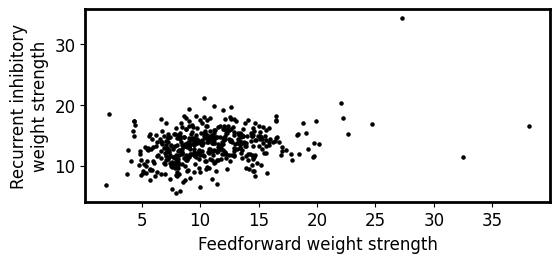

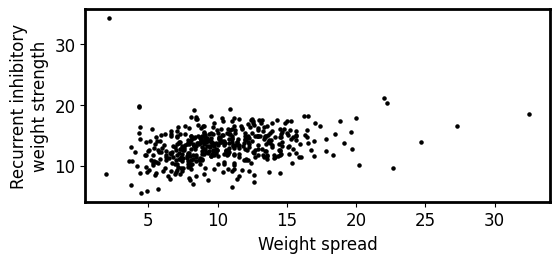

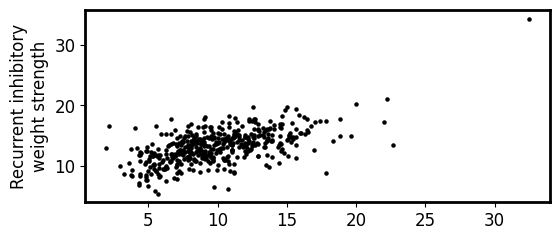

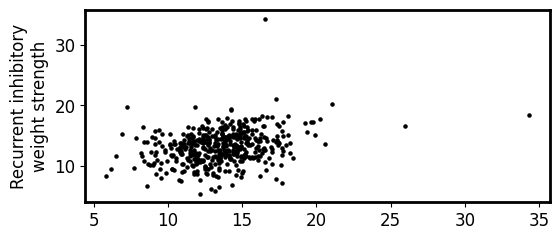

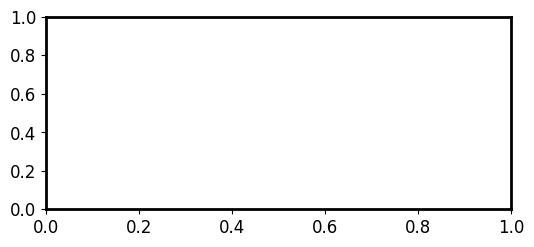

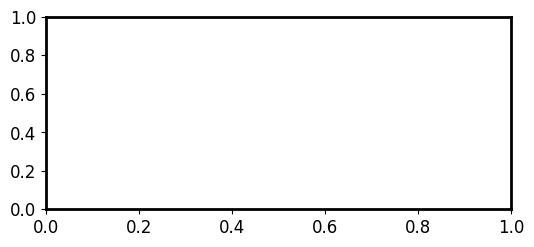

In [171]:
scale = 1
corr_fig, corr_axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_2, corr_axs_2 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_3, corr_axs_3 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_inh, corr_axs_inh = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))

corr_fig_4, corr_axs_4 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_5, corr_axs_5 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))

all_w_ee_summed = []
all_w_ee_summed_lag_1 = []
all_w_ee_summed_lag_2 = []
all_w_ie_summed = []
all_w_ie_summed_lag_1 = []
all_w_ie_summed_lag_2 = []
all_w_count = []
all_w_ee_maxs = []
all_w_ee_spreads = []

for w in all_w:
#     fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
    
    w_ee_entropy = np.array([calc_entropy(w[i, :25]) for i in range(25)])
    
    w_ee_summed = w[:25, :25].sum(axis=1)
    w_ee_summed_lag_1 = np.concatenate([w_ee_summed[1:], [np.nan]])
    w_ee_summed_lag_2 = np.concatenate([w_ee_summed[2:], [np.nan, np.nan]])
            
    w_ie_summed = np.zeros(25)
    w_count = np.zeros(25)
    w_ee_max = w[:25, :25].max(axis=1)
    w_ee_spread = np.zeros(25)
    
    
    for i in range(25):
        w_ee_spread[i] = np.sum(np.abs(i - np.arange(25)) * (w[i, :25] / np.sum(w[i, :25])))
        w_count[i] = np.count_nonzero(w[i, np.maximum(i-5, 0):i] > 1e-6, axis=0)
        w_ie_summed[i] = (w[np.maximum(i, 0):np.minimum(25, i+1), 25:]).sum()

        
    w_ie_summed_lag_1 = np.concatenate([w_ie_summed[1:], [np.nan]])
    w_ie_summed_lag_2 = np.concatenate([w_ie_summed[2:], [np.nan, np.nan]])
#     axs.plot(np.arange(25), w_ee_summed, color='red')
#     axs.plot(np.arange(25), np.abs(w_ie_summed), color='blue')
#     axs.plot(np.arange(25), w_count, color='black')
    
    all_w_ee_summed += list(w_ee_summed[5:23])
    all_w_ee_summed_lag_1 += list(np.abs(w_ee_summed_lag_1[5:23]))
    all_w_ee_summed_lag_2 += list(np.abs(w_ee_summed_lag_2[5:23]))
    all_w_ie_summed += list(np.abs(w_ie_summed[5:23]))
    all_w_ie_summed_lag_1 += list(np.abs(w_ie_summed_lag_1[5:23]))
    all_w_ie_summed_lag_2 += list(np.abs(w_ie_summed_lag_2[5:23]))
    all_w_count += list(w_count[5:])
    all_w_ee_maxs += list(w_ee_max[5:] / w_ee_summed[5:])
    all_w_ee_spreads += list(w_ee_spread[5:])

all_w_ee_summed = np.array(all_w_ee_summed)
all_w_ee_summed_lag_1 = np.array(all_w_ee_summed_lag_1)
all_w_ee_summed_lag_2 = np.array(all_w_ee_summed_lag_2)
all_w_ie_summed = np.array(all_w_ie_summed)
all_w_ie_summed_lag_1 = np.array(all_w_ie_summed_lag_1)
all_w_ie_summed_lag_2 = np.array(all_w_ie_summed_lag_2)
corr_axs.scatter(all_w_ee_summed, all_w_ie_summed_lag_2, color='black', s=5)
corr_axs.set_xlabel('Feedforward weight strength')
corr_axs.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed, all_w_ie_summed_lag_2)
print('Summed ee, lag 2', res.rvalue)

# need to control for total synapse strength here

# corr_axs_2.scatter(all_w_count + np.random.normal(size=len(all_w_count), scale=0.1), all_w_ie_summed, color='black', s=5)
# res = linregress(all_w_count, all_w_ie_summed)
# print(res.rvalue)

corr_axs_2.scatter(all_w_ee_summed_lag_1, all_w_ie_summed_lag_2, color='black', s=5)
corr_axs_2.set_xlabel('Weight spread')
corr_axs_2.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed_lag_1, all_w_ie_summed_lag_2)
print('Summed ee, lag 1', res.rvalue)

corr_axs_3.scatter(all_w_ee_summed_lag_2, all_w_ie_summed_lag_2, color='black', s=5)
# corr_axs_3.set_xlabel('Weight spread')
corr_axs_3.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed_lag_2, all_w_ie_summed_lag_2)
print('Summed ee, lag 0', res.rvalue)

corr_axs_inh.scatter(all_w_ie_summed_lag_1, all_w_ie_summed_lag_2, color='black', s=5)
# corr_axs_3.set_xlabel('Weight spread')
corr_axs_inh.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ie_summed_lag_1, all_w_ie_summed_lag_2)
print('Summed ie, lag 1', res.rvalue)

# cbar = corr_axs_3.scatter(all_w_ee_summed, all_w_ee_summed_lag_1, c=all_w_ie_summed_lag_1, s=5, cmap='plasma')
# corr_axs_3.set_xlim(0, 25)
# corr_axs_3.set_ylim(0, 25)
# corr_axs_3.set_xlabel('Cov 1')
# corr_axs_3.set_ylabel('Cov 2')
# corr_fig_3.colorbar(cbar)


# corr_axs_4.scatter(all_w_ee_summed * all_w_ee_summed_lag_1, all_w_ie_summed_lag_2, color='black', s=5)
# # corr_axs_4.set_xlabel('Weight spread')
# # corr_axs_4.set_ylabel('Recurrent inhibitory\nweight strength')
# corr_axs_4.set_xlim(0, 500)
# res = linregress(all_w_ee_summed * all_w_ee_summed_lag_1, all_w_ie_summed_lag_2)
# print(res.rvalue)

# corr_axs_5.scatter(all_w_ee_summed_lag_1 * all_w_ee_summed_lag_2, all_w_ie_summed_lag_2, color='black', s=5)
# # corr_axs_4.set_xlabel('Weight spread')
# # corr_axs_4.set_ylabel('Recurrent inhibitory\nweight strength')
# # corr_axs_5.set_xlim(0, 500)
# res = linregress(all_w_ee_summed_lag_1 * all_w_ee_summed_lag_2, all_w_ie_summed_lag_2)
# print(res.rvalue)


# corr_axs_3.set_title('Recurrent inhibitory\nweight strength')

# Todo: fit a model with max synapse size AND total synaptic strength, see if this better correlates?
# evidently not

reg = LinearRegression().fit(np.array([all_w_ee_summed, all_w_ee_summed_lag_1, all_w_ee_summed_lag_2, all_w_ie_summed_lag_1]).T, all_w_ie_summed_lag_2)
print(reg.coef_)
print(reg.score(np.array([all_w_ee_summed, all_w_ee_summed_lag_1, all_w_ee_summed_lag_2, all_w_ie_summed_lag_1]).T, all_w_ie_summed_lag_2))

In [173]:
file_name = 'decoder_ee_rollback_1_STD_EXPL_0.003_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_ACT_PEN_1_CHANGEP_0.00072_FRACI_0.75_SEED_502_2023-12-28_14:46:45.499087'
saved_weights_path = test_data_path = f'./sims_out/{file_name}/weight_matrices.csv'

all_w = read_csv(saved_weights_path, read_header=False)
weight_mat_side_len = np.sqrt(all_w.shape[1]).astype(int)
print(weight_mat_side_len)
all_w = [np.array(all_w.iloc[i]).reshape((weight_mat_side_len, weight_mat_side_len)) for i in range(all_w.shape[0])]

33


Summed ee, lag 2 0.014120332503881337
Summed ee, lag 1 -0.06039864705314543
Summed ee, lag 0 0.4943751168596442
Summed ie, lag 1 0.09365092177126609
[-0.01051532 -0.04186676  0.0986287   0.2015043 ]
0.29443103277640037


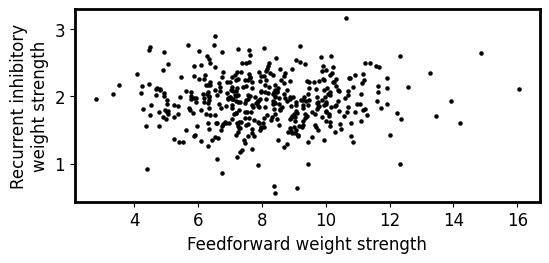

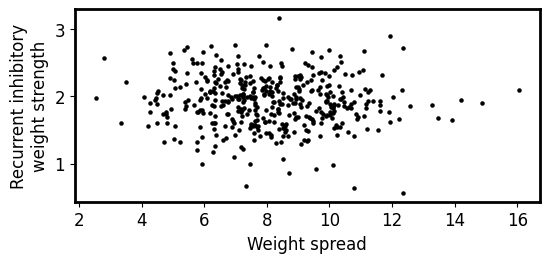

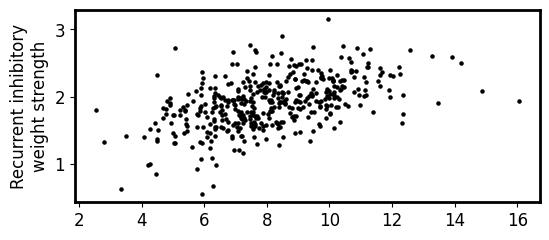

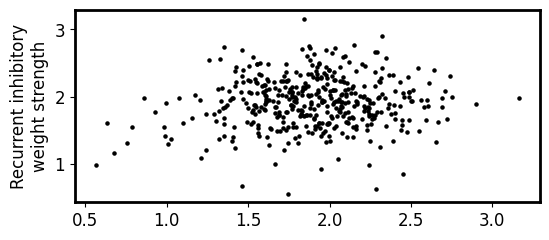

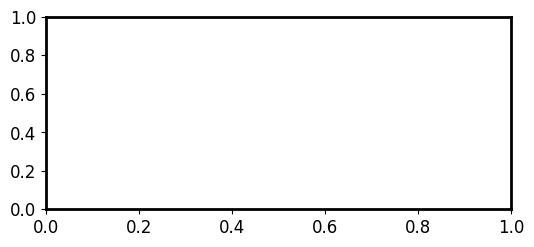

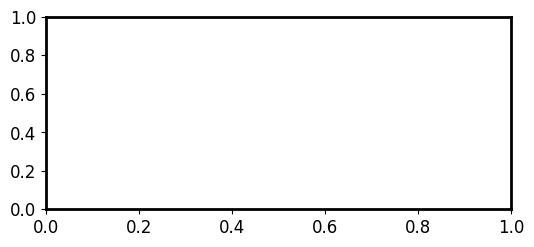

In [174]:
scale = 1
corr_fig, corr_axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_2, corr_axs_2 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_3, corr_axs_3 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_inh, corr_axs_inh = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))

corr_fig_4, corr_axs_4 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_5, corr_axs_5 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))

all_w_ee_summed = []
all_w_ee_summed_lag_1 = []
all_w_ee_summed_lag_2 = []
all_w_ie_summed = []
all_w_ie_summed_lag_1 = []
all_w_ie_summed_lag_2 = []
all_w_count = []
all_w_ee_maxs = []
all_w_ee_spreads = []

for w in all_w:
#     fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
    
    w_ee_entropy = np.array([calc_entropy(w[i, :25]) for i in range(25)])
    
    w_ee_summed = w[:25, :25].sum(axis=1)
    w_ee_summed_lag_1 = np.concatenate([w_ee_summed[1:], [np.nan]])
    w_ee_summed_lag_2 = np.concatenate([w_ee_summed[2:], [np.nan, np.nan]])
            
    w_ie_summed = np.zeros(25)
    w_count = np.zeros(25)
    w_ee_max = w[:25, :25].max(axis=1)
    w_ee_spread = np.zeros(25)
    
    
    for i in range(25):
        w_ee_spread[i] = np.sum(np.abs(i - np.arange(25)) * (w[i, :25] / np.sum(w[i, :25])))
        w_count[i] = np.count_nonzero(w[i, np.maximum(i-5, 0):i] > 1e-6, axis=0)
        w_ie_summed[i] = (w[np.maximum(i, 0):np.minimum(25, i+1), 25:]).sum()

        
    w_ie_summed_lag_1 = np.concatenate([w_ie_summed[1:], [np.nan]])
    w_ie_summed_lag_2 = np.concatenate([w_ie_summed[2:], [np.nan, np.nan]])
#     axs.plot(np.arange(25), w_ee_summed, color='red')
#     axs.plot(np.arange(25), np.abs(w_ie_summed), color='blue')
#     axs.plot(np.arange(25), w_count, color='black')
    
    all_w_ee_summed += list(w_ee_summed[5:23])
    all_w_ee_summed_lag_1 += list(np.abs(w_ee_summed_lag_1[5:23]))
    all_w_ee_summed_lag_2 += list(np.abs(w_ee_summed_lag_2[5:23]))
    all_w_ie_summed += list(np.abs(w_ie_summed[5:23]))
    all_w_ie_summed_lag_1 += list(np.abs(w_ie_summed_lag_1[5:23]))
    all_w_ie_summed_lag_2 += list(np.abs(w_ie_summed_lag_2[5:23]))
    all_w_count += list(w_count[5:])
    all_w_ee_maxs += list(w_ee_max[5:] / w_ee_summed[5:])
    all_w_ee_spreads += list(w_ee_spread[5:])

all_w_ee_summed = np.array(all_w_ee_summed)
all_w_ee_summed_lag_1 = np.array(all_w_ee_summed_lag_1)
all_w_ee_summed_lag_2 = np.array(all_w_ee_summed_lag_2)
all_w_ie_summed = np.array(all_w_ie_summed)
all_w_ie_summed_lag_1 = np.array(all_w_ie_summed_lag_1)
all_w_ie_summed_lag_2 = np.array(all_w_ie_summed_lag_2)
corr_axs.scatter(all_w_ee_summed, all_w_ie_summed_lag_2, color='black', s=5)
corr_axs.set_xlabel('Feedforward weight strength')
corr_axs.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed, all_w_ie_summed_lag_2)
print('Summed ee, lag 2', res.rvalue)

# need to control for total synapse strength here

# corr_axs_2.scatter(all_w_count + np.random.normal(size=len(all_w_count), scale=0.1), all_w_ie_summed, color='black', s=5)
# res = linregress(all_w_count, all_w_ie_summed)
# print(res.rvalue)

corr_axs_2.scatter(all_w_ee_summed_lag_1, all_w_ie_summed_lag_2, color='black', s=5)
corr_axs_2.set_xlabel('Weight spread')
corr_axs_2.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed_lag_1, all_w_ie_summed_lag_2)
print('Summed ee, lag 1', res.rvalue)

corr_axs_3.scatter(all_w_ee_summed_lag_2, all_w_ie_summed_lag_2, color='black', s=5)
# corr_axs_3.set_xlabel('Weight spread')
corr_axs_3.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed_lag_2, all_w_ie_summed_lag_2)
print('Summed ee, lag 0', res.rvalue)

corr_axs_inh.scatter(all_w_ie_summed_lag_1, all_w_ie_summed_lag_2, color='black', s=5)
# corr_axs_3.set_xlabel('Weight spread')
corr_axs_inh.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ie_summed_lag_1, all_w_ie_summed_lag_2)
print('Summed ie, lag 1', res.rvalue)

# cbar = corr_axs_3.scatter(all_w_ee_summed, all_w_ee_summed_lag_1, c=all_w_ie_summed_lag_1, s=5, cmap='plasma')
# corr_axs_3.set_xlim(0, 25)
# corr_axs_3.set_ylim(0, 25)
# corr_axs_3.set_xlabel('Cov 1')
# corr_axs_3.set_ylabel('Cov 2')
# corr_fig_3.colorbar(cbar)


# corr_axs_4.scatter(all_w_ee_summed * all_w_ee_summed_lag_1, all_w_ie_summed_lag_2, color='black', s=5)
# # corr_axs_4.set_xlabel('Weight spread')
# # corr_axs_4.set_ylabel('Recurrent inhibitory\nweight strength')
# corr_axs_4.set_xlim(0, 500)
# res = linregress(all_w_ee_summed * all_w_ee_summed_lag_1, all_w_ie_summed_lag_2)
# print(res.rvalue)

# corr_axs_5.scatter(all_w_ee_summed_lag_1 * all_w_ee_summed_lag_2, all_w_ie_summed_lag_2, color='black', s=5)
# # corr_axs_4.set_xlabel('Weight spread')
# # corr_axs_4.set_ylabel('Recurrent inhibitory\nweight strength')
# # corr_axs_5.set_xlim(0, 500)
# res = linregress(all_w_ee_summed_lag_1 * all_w_ee_summed_lag_2, all_w_ie_summed_lag_2)
# print(res.rvalue)


# corr_axs_3.set_title('Recurrent inhibitory\nweight strength')

# Todo: fit a model with max synapse size AND total synaptic strength, see if this better correlates?
# evidently not

reg = LinearRegression().fit(np.array([all_w_ee_summed, all_w_ee_summed_lag_1, all_w_ee_summed_lag_2, all_w_ie_summed_lag_1]).T, all_w_ie_summed_lag_2)
print(reg.coef_)
print(reg.score(np.array([all_w_ee_summed, all_w_ee_summed_lag_1, all_w_ee_summed_lag_2, all_w_ie_summed_lag_1]).T, all_w_ie_summed_lag_2))

In [202]:
file_name = 'stress_test_ei_decoder_none_dropped_1_STD_EXPL_0.003_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_ACT_PEN_1_CHANGEP_0.00072_FRACI_0.75_SEED_502_2024-01-02_17:56:47.902151'

all_rs = []

for i in range(12):
    saved_activity_path = f'./sims_out/{file_name}/all_r_{i}.csv'

    all_r = read_csv(saved_activity_path, read_header=False)
    all_r = np.array(all_r)
    total_steps = all_r.shape[0]
    
    all_r = all_r.reshape(5, int(total_steps/5), 25)
    all_rs.append(all_r)

all_rs = np.stack(all_rs)

In [204]:
for i in range(all_rs.shape[1]):
    rs = all_rs[:, i, ...]
    T = 0.11 # Total duration of one network simulation
    dt = 1e-4 # Timestep
    t = np.linspace(0, T, int(T / dt))
    r_summed = np.sum(rs, axis=1)
    r_active_mask =  np.where(r_summed != 0, 1, 0).astype(bool)
    r_summed_safe_divide = np.where(r_active_mask, r_summed, 1)
    r_normed = rs / r_summed_safe_divide[:, np.newaxis, :]
    t_means = np.sum(t.reshape(t.shape[0], 1) * r_normed, axis=1)
#     print(t_means.shape)
    print(t_means.std(axis=0))

[0.00019833 0.00038321 0.0004668  0.00035043 0.0002921  0.00052349
 0.00131111 0.00086191 0.00120702 0.00028653 0.0005709  0.0009281
 0.00043103 0.0002067  0.00037768 0.0006164  0.00029875 0.00011889
 0.00099466 0.00073149 0.00065129 0.00058501 0.00100018 0.0006895
 0.00029535]
[7.45083106e-05 4.33173985e-04 5.90587510e-04 1.04044793e-03
 4.32904433e-04 5.59267374e-04 6.20116543e-04 6.83654824e-04
 6.09911048e-04 6.49722639e-04 1.72784467e-04 8.30197704e-04
 1.03567459e-03 5.70916406e-04 5.12080152e-04 1.13516746e-03
 9.22238594e-04 5.21804044e-04 6.55432325e-04 8.88790261e-04
 8.08812270e-04 9.20120190e-04 1.79124503e-03 2.08019178e-03
 1.08118495e-03]
[0.00017787 0.00192389 0.00126747 0.00110538 0.00209911 0.00131529
 0.00121868 0.00179839 0.00082763 0.0012566  0.00185631 0.00058695
 0.00089815 0.00104488 0.00114483 0.00127911 0.00085791 0.00145841
 0.00173857 0.00204701 0.0005431  0.00020469 0.00216731 0.00207903
 0.00128932]
[3.76553285e-05 4.54031777e-04 7.31320095e-04 1.18499015e